**Logistic Regression**

**Feature Importance**

Testing dataset accuracy: 0.7463414634146341
Mean CV accuracy: 0.7571197411003237


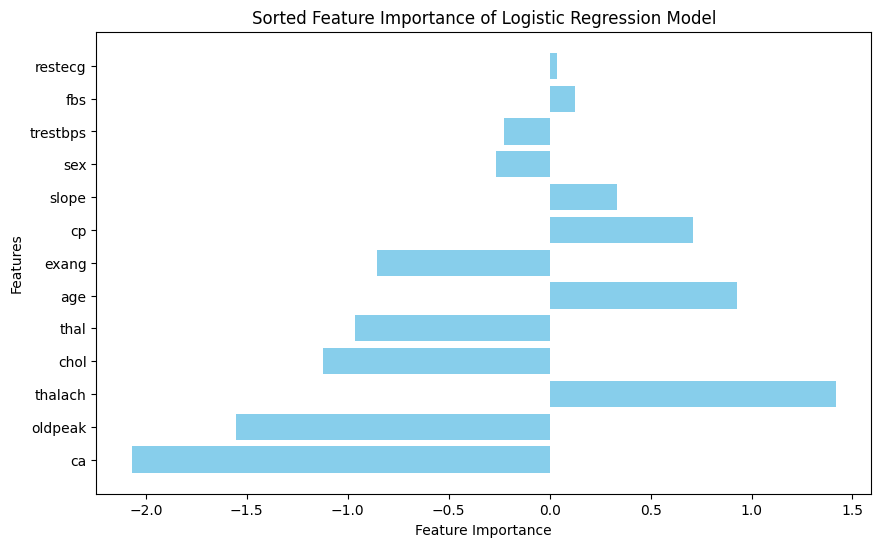

In [88]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(penalty='l2', fit_intercept=True, random_state=1, max_iter=100, solver='liblinear')
log_reg.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = log_reg.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=10)
print("Mean CV accuracy:", cv_scores.mean())


# Get feature names and their importance values
feature_importance = list(zip(X.columns, log_reg.coef_[0]))

# Sort feature importance values based on absolute value
sorted_feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Unzip the sorted feature importance values
sorted_features, sorted_importance = zip(*sorted_feature_importance)

# Plotting sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Sorted Feature Importance of Logistic Regression Model')
plt.show()


Accuracy Calculation (ok)

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target","fbs","age","restecg","chol","trestbps","exang"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize and fit the logistic regression model
log_reg = LogisticRegression(penalty='l1', fit_intercept=False, random_state=1, max_iter=100, solver='liblinear')
log_reg.fit(X_train, y_train)

cv_scores = cross_val_score(log_reg, X_scaled, y, cv=10)
print("Mean CV accuracy:", cv_scores.mean())


# Calculate accuracy on the testing dataset
test_accuracy = log_reg.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

Mean CV accuracy: 0.7532076908433277
Testing dataset accuracy: 0.7560975609756098


**Decision Tree**

**Feature Importance**

Testing dataset accuracy: 0.751219512195122
Mean CV accuracy: 0.7307919284218543


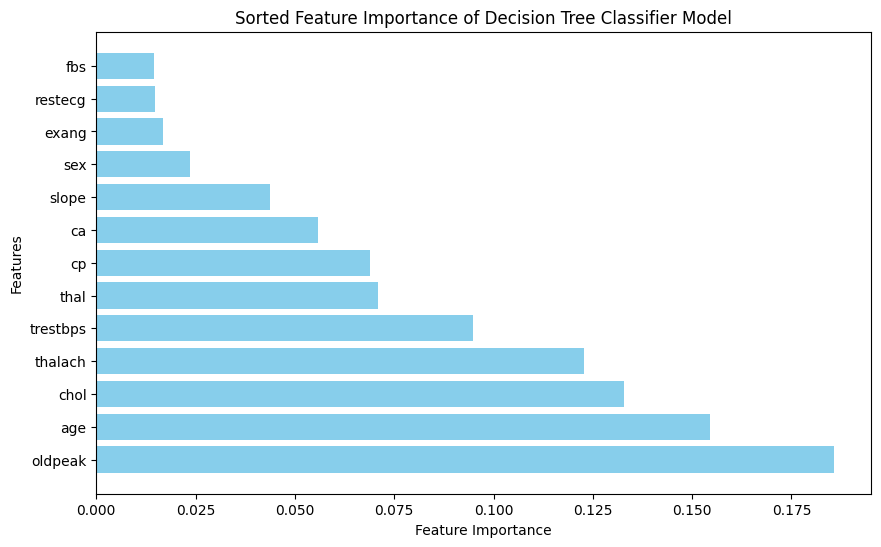

In [90]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize and fit the Decision Tree model
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=300, min_samples_split=2,
                                       max_features=None, random_state=0, max_leaf_nodes=None,
                                       ccp_alpha=0.0)
decision_tree.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = decision_tree.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(decision_tree, X_scaled, y, cv=10)
print("Mean CV accuracy:", cv_scores.mean())

# Get feature names and their importance values
feature_importance = list(zip(X.columns, decision_tree.feature_importances_))

# Sort feature importance values based on absolute value
sorted_feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Unzip the sorted feature importance values
sorted_features, sorted_importance = zip(*sorted_feature_importance)

# Plotting sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Sorted Feature Importance of Decision Tree Classifier Model')
plt.show()


**Accuracy Calculation**

In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["fbs","restecg","slope","trestbps","exang","sex","target"])  # Features
y = data["target"]  # Target variable
print(X)
# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Initialize and fit the decision tree classifier model
dt_classifier = DecisionTreeClassifier(criterion='gini',
                                       max_depth=300,
                                       min_samples_split=2,
                                       max_features=None,
                                       random_state=0,
                                       max_leaf_nodes=None,
                                       ccp_alpha=0.0)
dt_classifier.fit(X_train, y_train)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(dt_classifier, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

# Calculate accuracy on the testing dataset
test_accuracy = dt_classifier.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)


      age  cp  chol  thalach  oldpeak  ca  thal
0      52   0   211      168     1.02   1     3
1      52   0   203      155     3.02   0     3
2      69   0   174      125     2.56   0     2
3      60   0   202      160     0.05   1     3
4      62   0   293      105     1.96   2     1
...   ...  ..   ...      ...      ...  ..   ...
1020   58   1   221      164    -0.21   0     1
1021   60   0   258      140     2.89   0     3
1022   46   0   274      118     1.02   0     2
1023   49   0   253      159     0.00   0     1
1024   53   0   187      113     1.58   1     2

[1025 rows x 7 columns]
Mean 10-fold cross-validation accuracy: 0.7337140681515324
Testing dataset accuracy: 0.697560975609756


**Randam Forest**

**Feature Importance**

Testing dataset accuracy: 0.7853658536585366
Mean 10-fold cross-validation accuracy: 0.7532552826956025


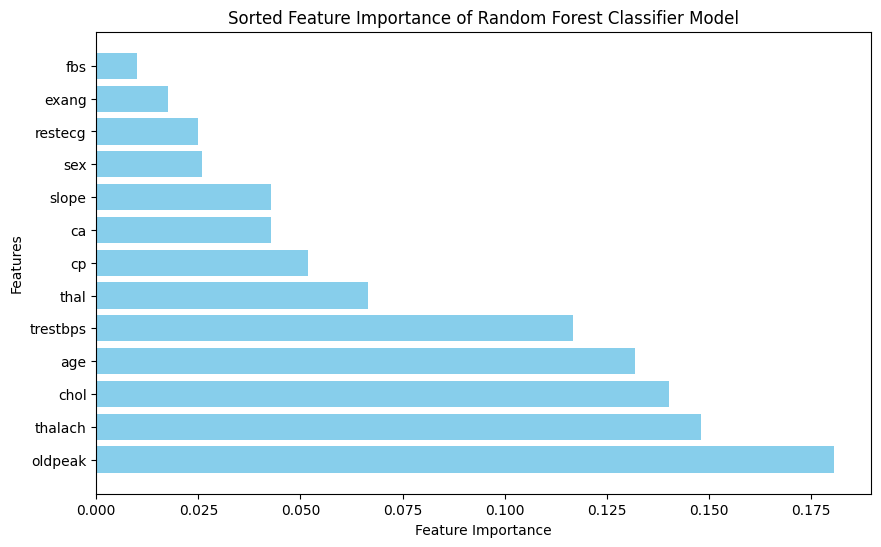

In [92]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

# Initialize and fit the Random Forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=300,
                                        criterion='gini',
                                        max_depth=300,
                                        min_samples_split=2,
                                        max_features='sqrt',
                                        bootstrap=True,
                                        random_state=0,
                                        max_samples=None)
rf_classifier.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = rf_classifier.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

# Get feature names and their importance values
feature_importance = list(zip(X.columns, rf_classifier.feature_importances_))

# Sort feature importance values based on absolute value
sorted_feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Unzip the sorted feature importance values
sorted_features, sorted_importance = zip(*sorted_feature_importance)

# Plotting sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Sorted Feature Importance of Random Forest Classifier Model')
plt.show()


**Accuracy Calculation**

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target","fbs","restecg","slope","sex","exang","ca","cp"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

# Initialize and fit the Random Forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=300,
                                        criterion='gini',
                                        max_depth=300,
                                        min_samples_split=2,
                                        max_features='sqrt',
                                        bootstrap=True,
                                        random_state=42,
                                        max_samples=None)
rf_classifier.fit(X_train, y_train)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

test_accuracy = rf_classifier.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)


Mean 10-fold cross-validation accuracy: 0.7600513992004568
Testing dataset accuracy: 0.7609756097560976


**Support Vector Machine**

**Feature Importance**

Testing dataset accuracy: 0.7170731707317073
Mean 10-fold cross-validation accuracy: 0.7609756097560976


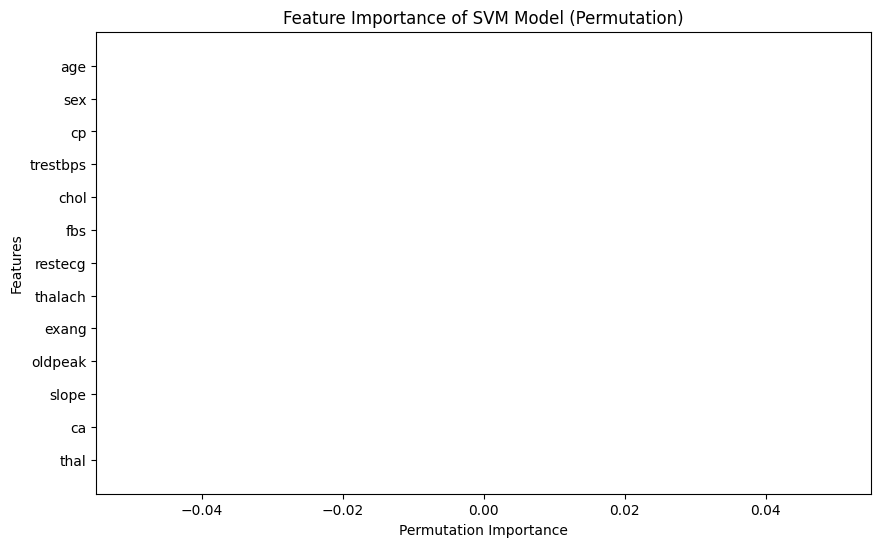

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=50)

# Initialize and fit the SVM model
svm_model = SVC(C=0.0085, kernel='rbf', degree=3, gamma='scale', probability=False, tol=0.001, cache_size=200, max_iter=-1, random_state=0)
svm_model.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = svm_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

# Get feature names
feature_names = X.columns

# Compute permutation importance
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=0)

# Get feature importance scores
importance_scores = perm_importance.importances_mean
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importance_scores, color='skyblue')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance of SVM Model (Permutation)')
plt.show()


**SVM Accuracy Calculation**

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target","fbs","chol","trestbps","restecg","age","thal"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=88)

# Initialize and fit the SVM model
svm_model = SVC(C=0.0085, kernel='rbf', degree=3, gamma='scale', probability=False, tol=0.001, cache_size=200, max_iter=-1, random_state=0)
svm_model.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = svm_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(svm_model, X_scaled, y, cv=5)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())


Testing dataset accuracy: 0.7609756097560976
Mean 10-fold cross-validation accuracy: 0.7609756097560976


KNN

**Feature Importance**

Testing dataset accuracy: 0.7317073170731707
Mean 10-fold cross-validation accuracy: 0.7181039406053683


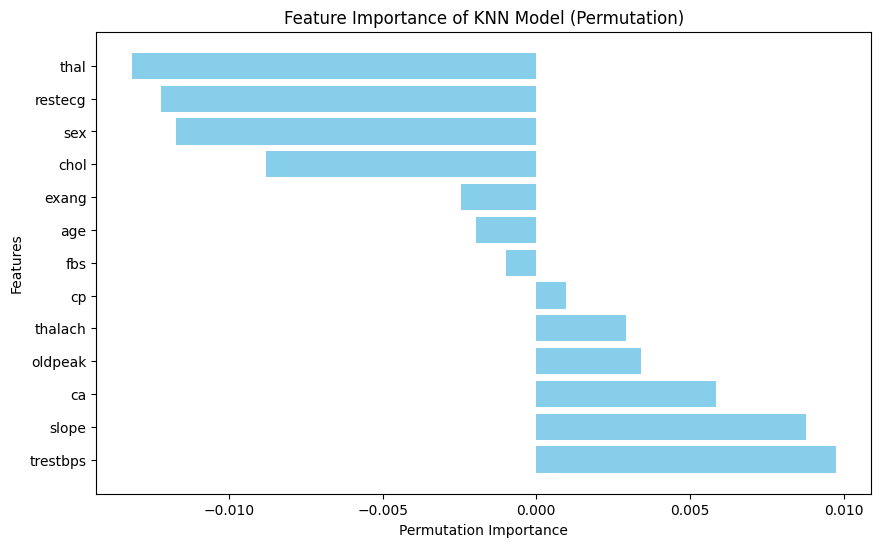

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto', leaf_size=30, p=10, metric='minkowski')
knn_model.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = knn_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(knn_model, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

# Perform permutation importance
perm_importance = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=0)

# Get feature names
feature_names = X.columns

# Get feature importance scores
importance_scores = perm_importance.importances_mean
sorted_indices = importance_scores.argsort()[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importance_scores, color='skyblue')
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Feature Importance of KNN Model (Permutation)')
plt.show()


In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target", "age","restecg","trestbps","oldpeak","chol"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Initialize and fit the KNN model
knn_model = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto', leaf_size=30, p=20, metric='minkowski')
knn_model.fit(X_train, y_train)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(knn_model, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

# Calculate and print testing dataset accuracy
test_accuracy = knn_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)


Mean 10-fold cross-validation accuracy: 0.7463735008566534
Testing dataset accuracy: 0.7853658536585366


**Multi Layer Preceptron**

Testing dataset accuracy: 0.7560975609756098
Mean 10-fold cross-validation accuracy: 0.760013325718637


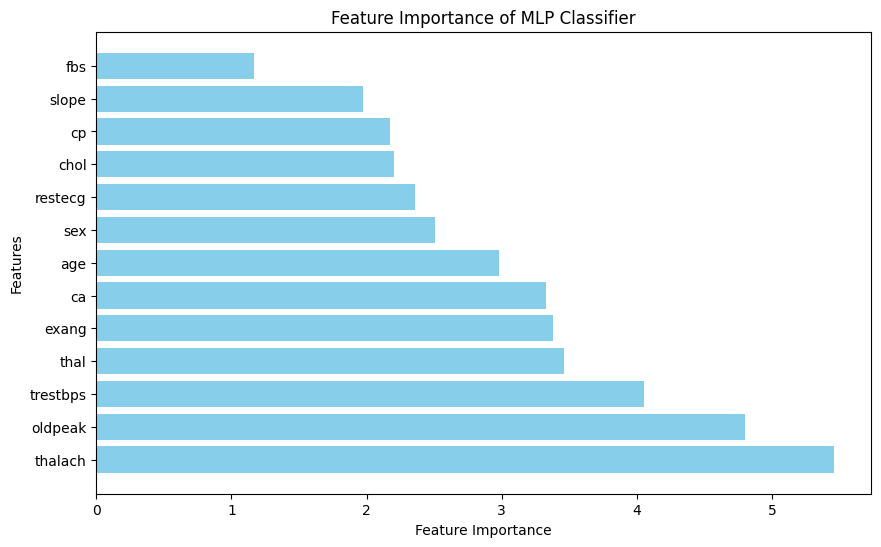

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=55)

# Initialize and fit the MLP model with increased max_iter
mlp_model = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='lbfgs', alpha=0.0001,
                          learning_rate='constant', max_iter=100000, shuffle=True, random_state=20)
mlp_model.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = mlp_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(mlp_model, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

# Get the weights of the input layer
input_layer_weights = mlp_model.coefs_[0]

# Calculate the absolute sum of weights for each feature
feature_importance = np.abs(input_layer_weights).sum(axis=1)

# Get the feature names
feature_names = X.columns

# Sort the feature importance values and feature names
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]


# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of MLP Classifier')
plt.show()


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target","ca","fbs","sex","exang","slope"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=55)

# Initialize and fit the MLP model with increased max_iter
mlp_model = MLPClassifier(hidden_layer_sizes=(5, 2), activation='relu', solver='lbfgs', alpha=0.0001,
                          learning_rate='constant', max_iter=100000, shuffle=True, random_state=20)
mlp_model.fit(X_train, y_train)


# Calculate accuracy on the testing dataset
test_accuracy = mlp_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(mlp_model, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

Testing dataset accuracy: 0.7365853658536585
Mean 10-fold cross-validation accuracy: 0.7571102227298686


**Navie Bayes**

**Feature Importance**

Testing dataset accuracy: 0.6146341463414634
Mean 10-fold cross-validation accuracy: 0.6604892442413859


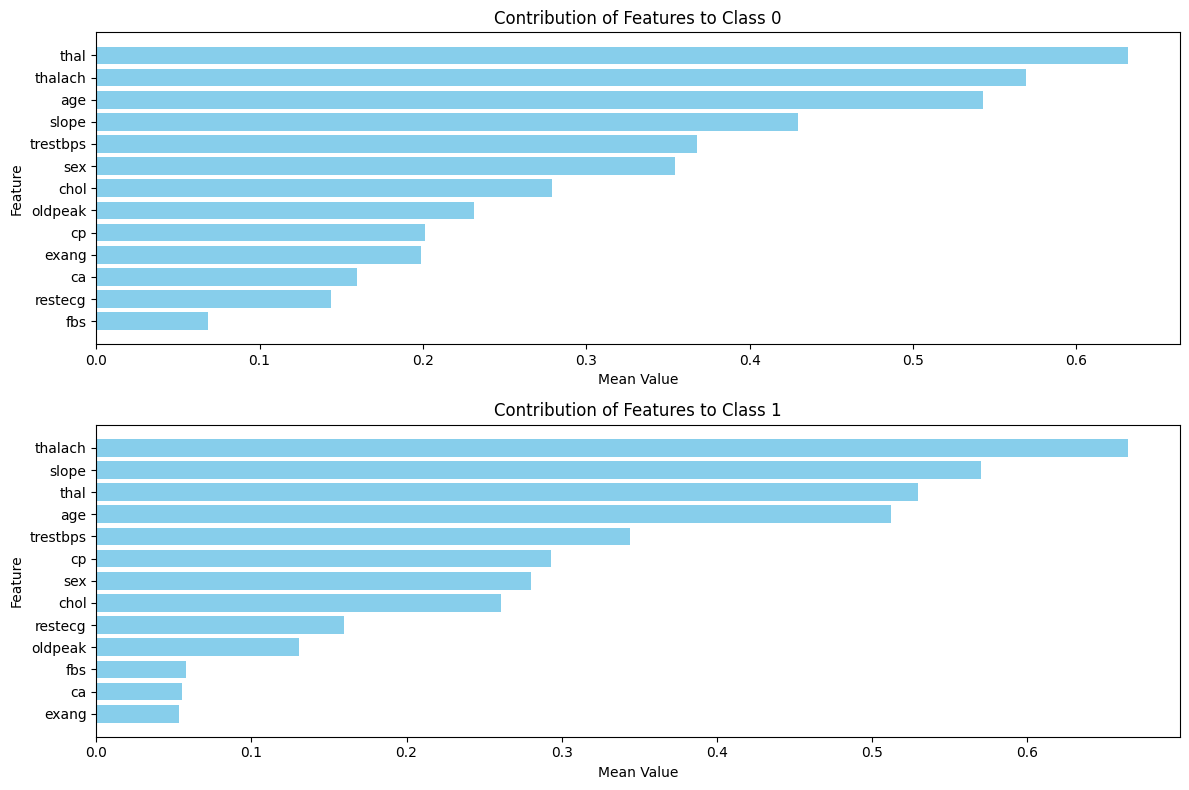

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=100)

# Initialize and fit the Naive Bayes model
nb_model = GaussianNB(var_smoothing=1e-09)
nb_model.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = nb_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=10)
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

# Get feature names
feature_names = X.columns

# Get class names
class_names = nb_model.classes_

# Plot the contribution of each feature to each class
plt.figure(figsize=(12, 8))

for i, class_name in enumerate(class_names):
    mean_values = nb_model.theta_[i]
    sorted_indices = np.argsort(mean_values)
    sorted_feature_names = feature_names[sorted_indices]
    sorted_mean_values = mean_values[sorted_indices]

    plt.subplot(2, 1, i+1)
    plt.barh(sorted_feature_names, sorted_mean_values, color='skyblue')
    plt.xlabel('Mean Value')
    plt.ylabel('Feature')
    plt.title(f'Contribution of Features to Class {class_name}')

plt.tight_layout()
plt.show()


**Accuracy calculation**

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target","chol","cp","oldpeak","restecg","fbs"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Initialize and fit the Naive Bayes model
nb_model = GaussianNB(var_smoothing=1e-09)
nb_model.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = nb_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(nb_model, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

Testing dataset accuracy: 0.7463414634146341
Mean 10-fold cross-validation accuracy: 0.67611840852846


**Xtreme Gradient Booosting**

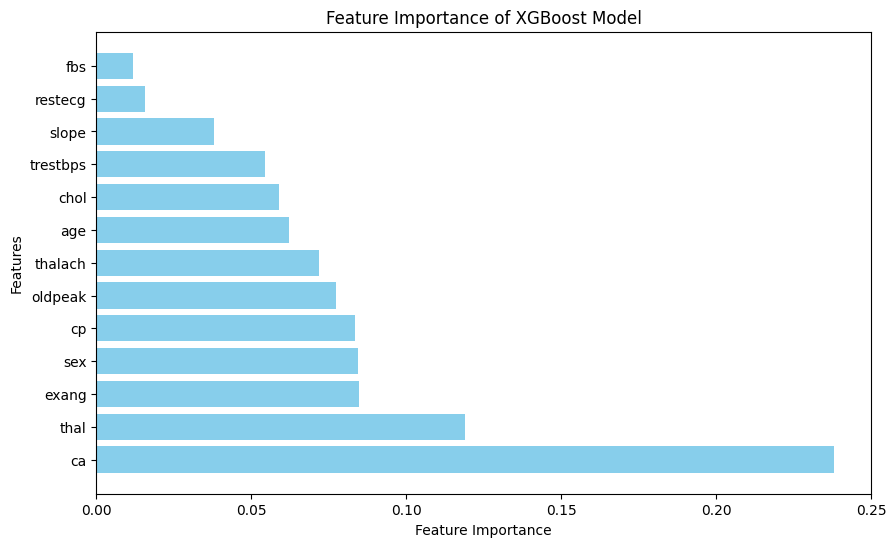

Testing dataset accuracy: 0.7170731707317073
Mean 10-fold cross-validation accuracy: 0.7513325718636968


In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
xgb_model = XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100,
                           max_depth=3, use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Calculate feature importance
feature_importance = xgb_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importance in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of XGBoost Model')
plt.show()

# Calculate accuracy on the testing dataset
test_accuracy = xgb_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())


**Accuracy Calculation**

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target","fbs","trestbps","restecg"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Initialize and fit the XGBoost model
xgb_model = XGBClassifier(objective="binary:logistic", learning_rate=0.1, n_estimators=100,
                           max_depth=3, use_label_encoder=False, eval_metric="logloss", random_state=0)
xgb_model.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = xgb_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(xgb_model, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())


Testing dataset accuracy: 0.7365853658536585
Mean 10-fold cross-validation accuracy: 0.74347991623834


Gradient Boosting

Testing dataset accuracy: 0.7317073170731707
Mean 10-fold cross-validation accuracy: 0.7336759946697126


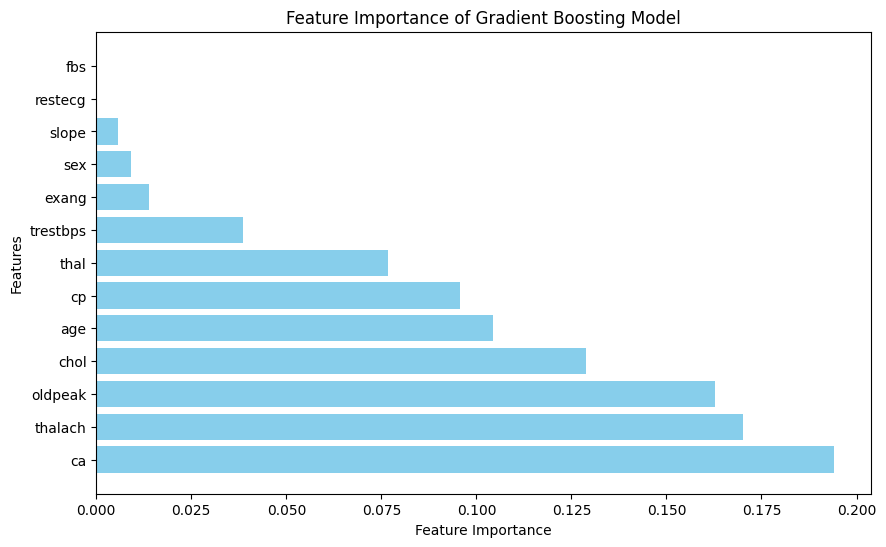

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target"])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(loss='log_loss', learning_rate=1.0, n_estimators=20,
                                      subsample=1.0, criterion='friedman_mse', max_depth=2,
                                      random_state=1)
gb_model.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = gb_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(gb_model, X_scaled, y, cv=10)
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())

# Calculate feature importances
feature_importances = gb_model.feature_importances_
feature_names = X.columns

# Sort feature importances and feature names
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot horizontal bar graph for feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance of Gradient Boosting Model')
plt.show()


**Accuracy Calculation**

In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

# Load the CSV file
data = pd.read_csv(r"C:\Users\pspto\Desktop\Demo\Heart_Dataset_Original.csv")  # Update with your dataset path

# Assuming the target column is named "target", change it accordingly
X = data.drop(columns=["target","fbs","slope","exang","sex","restecg",])  # Features
y = data["target"]  # Target variable

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Initialize and fit the Gradient Boosting model
gb_model = GradientBoostingClassifier(loss='log_loss', learning_rate=1.1, n_estimators=17,
                                      subsample=1.0, criterion='friedman_mse', max_depth=2,
                                      random_state=1)
gb_model.fit(X_train, y_train)

# Calculate accuracy on the testing dataset
test_accuracy = gb_model.score(X_test, y_test)
print("Testing dataset accuracy:", test_accuracy)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(gb_model, X_scaled, y, cv=10)

# Print the mean cross-validation accuracy
print("Mean 10-fold cross-validation accuracy:", cv_scores.mean())


Testing dataset accuracy: 0.7365853658536585
Mean 10-fold cross-validation accuracy: 0.7259185227489053


In [106]:
import pickle
pickle_out=open("Model_dt_noise_Final.pkl",mode="wb")
pickle.dump(dt_classifier,pickle_out)
pickle_out.close()


Adding Noise to the Dataset

In [ ]:
import numpy as np

def add_gaussian_noise(data, mean=0, std_dev=0.1):
    """
    Add Gaussian noise to the input data.

    Parameters:
        data (numpy.ndarray): Input data array.
        mean (float): Mean of the Gaussian distribution (default: 0).
        std_dev (float): Standard deviation of the Gaussian distribution (default: 0.1).

    Returns:
        numpy.ndarray: Noised data array.
    """
    noise = np.random.normal(mean, std_dev, data.shape)
    noised_data = data.copy()  # Make a copy of the original data
    noised_data[1:] += noise[1:]  # Add noise to all rows except the first row
    return noised_data


dataset = np.genfromtxt('/content/Heart_Dataset_Original.csv', delimiter=',')

# Add Gaussian noise to the dataset (except the first row) with mean=0 and std_dev=0.1
noised_dataset = add_gaussian_noise(dataset, mean=0, std_dev=0.1)
fmt = ['%d', '%d', '%d', '%d', '%d', '%d', '%d', '%d', '%d', '%0.2f', '%d', '%d', '%d',"%d"]
np.savetxt('noised_dataset.csv', noised_dataset, delimiter=',', fmt=fmt)

print("Noised dataset saved to 'noised_dataset.csv'")
